In [1]:
import matplotlib.pyplot as plt
import torch
import torch.optim.lr_scheduler as schedulers
from utils import retrieve_setup, retrieve_training_params

/Users/juangarcia/anaconda3/envs/ada/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/juangarcia/anaconda3/envs/ada/lib/python3.9/site-packages/torchvision/image.so, 6): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: /Users/juangarcia/anaconda3/envs/ada/lib/python3.9/site-packages/torchvision/image.so
  Expected in: /Users/juangarcia/anaconda3/envs/ada/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib
 in /Users/juangarcia/anaconda3/envs/ada/lib/python3.9/site-packages/torchvision/image.so'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/juangarcia/anaconda3/envs/ada/lib/python3.9/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register

In [2]:
model_name = "MobileNetV3Small" 
dataset_name = "CIFAR10"
lr_max = 3e-4 # achived in step 2150
lr_min = 5e-5 # achived in step 350
n_epochs = 150

In [3]:
# retrieves
_, dataset = retrieve_setup(model_name, dataset_name)
model = torch.nn.Linear(1, 1)
optimizer, _, loss_fn, _, batch_size = retrieve_training_params(model, dataset_name, "LinearLR","parameters.yml")

# change lr from default to lr_max
for g in optimizer.param_groups:
    g["lr"] = lr_max

# implement linear increasing scheduler
total_iters = int(len(dataset["train"])/batch_size*n_epochs)
start_factor = lr_min/lr_max

Files already downloaded and verified
Files already downloaded and verified


### FixLR

/Users/juangarcia/anaconda3/envs/ada/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


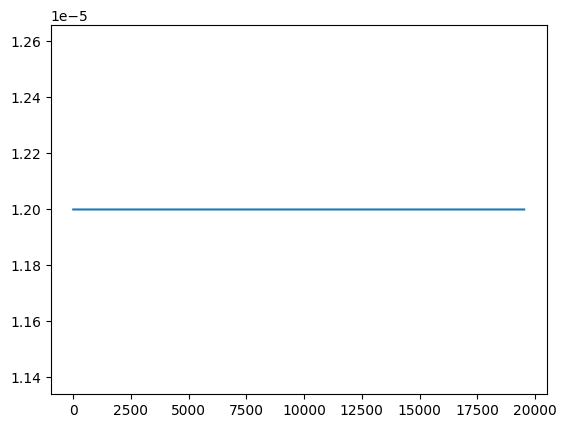

In [13]:
scheduler = schedulers.LambdaLR(optimizer, lr_lambda=lambda _: 1)

lrs = []
for i in range(total_iters):
    optimizer.step()
    lrs.append(scheduler.get_last_lr()[0])
    scheduler.step()

plt.plot(lrs)

### LinearLR

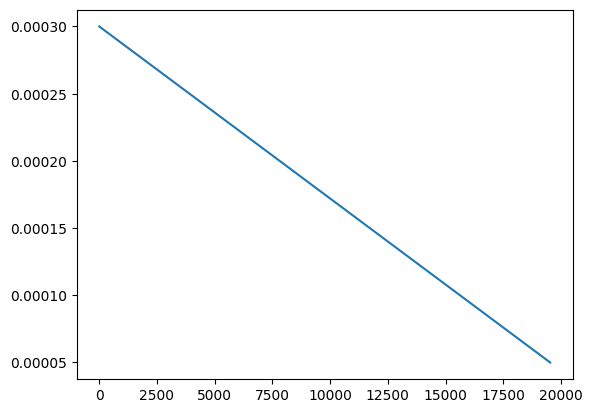

In [17]:
start_factor = 1
end_factor = lr_min/lr_max
scheduler = schedulers.LinearLR(optimizer, start_factor=start_factor, end_factor=end_factor, total_iters=total_iters)

lrs = []
for i in range(total_iters):
    optimizer.step()
    lrs.append(scheduler.get_last_lr()[0])
    scheduler.step()

plt.plot(lrs)

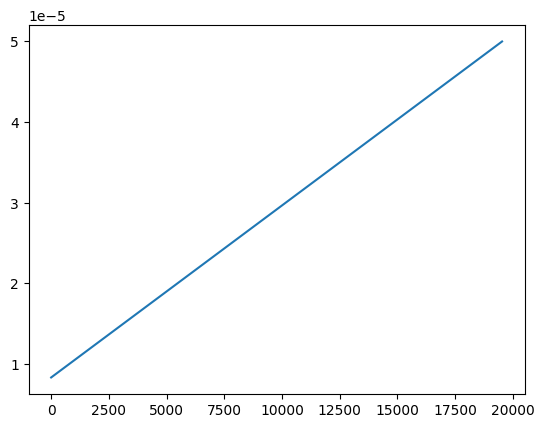

In [18]:
scheduler = schedulers.LinearLR(optimizer, start_factor=end_factor, end_factor=start_factor, total_iters=total_iters)

lrs = []
for i in range(total_iters):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)

### OneCycleLR Scheduler

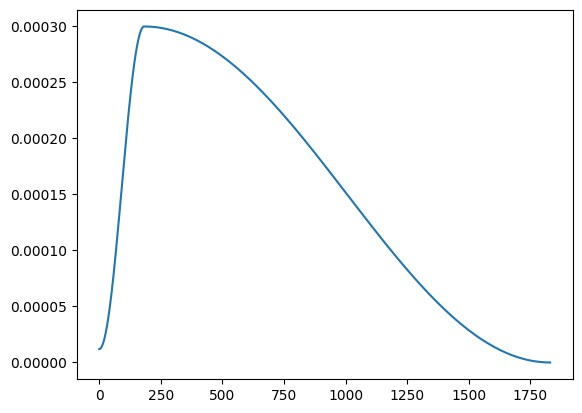

In [6]:
scheduler = schedulers.OneCycleLR(optimizer, max_lr=lr_max, pct_start=0.10, total_steps=total_iters)

lrs = []
for i in range(total_iters):
    optimizer.step()
    lrs.append(scheduler.get_last_lr()[0])
    scheduler.step()

plt.plot(lrs)

### CyclicLR - triangular

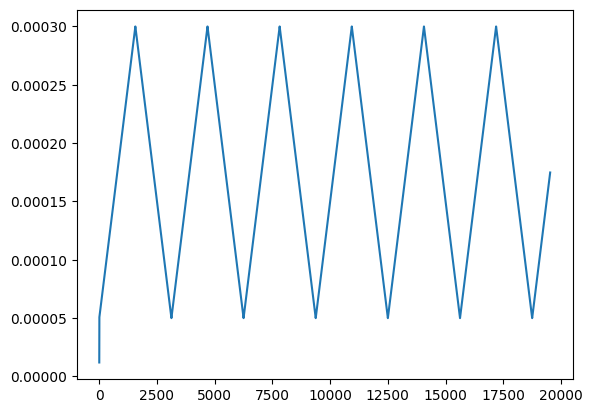

In [39]:
step_size_up = 4 * len(dataset["train"])/batch_size
scheduler = schedulers.CyclicLR(optimizer, base_lr=lr_min, max_lr=lr_max, step_size_up=step_size_up, mode="triangular")

lrs = []
for i in range(total_iters):
    optimizer.step()
    lrs.append(scheduler.get_last_lr()[0])
    scheduler.step()

plt.plot(lrs)

### CyclicLR - triangular2

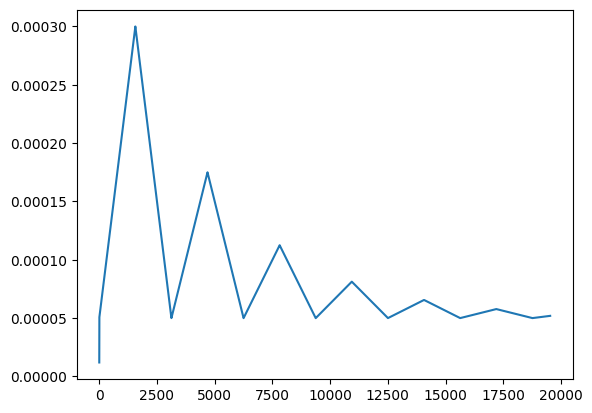

In [38]:
step_size_up = 4 * len(dataset["train"])/batch_size
scheduler = schedulers.CyclicLR(optimizer, base_lr=lr_min, max_lr=lr_max, step_size_up=step_size_up, mode="triangular2")

lrs = []
for i in range(total_iters):
    optimizer.step()
    lrs.append(scheduler.get_last_lr()[0])
    scheduler.step()

plt.plot(lrs)